## Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv("/content/titanic_train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Checking for null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As we can see that the Cabin data is mostly filled with Null values, it is better to get rid of that column, because that column will do more damage than benefit.

Again Cabin can give vital information, as people in the top cabins might have a higher survival chance than those on the lower decks. But we do have a similar kind of column which is Passenger Class, 1st class people might have a higher chance of surviaval as they must be mostly VIPs.

In [5]:
df = df.drop(['Cabin'], axis = 1)

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Let us look at the Tickets columns.

It is evident that there are 681 different values, so let us drop the tickets column as well for now.

In [7]:
df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [8]:
df = df.drop(['Ticket'], axis = 1)

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


Since name and passenger ID also have unique values and do not suggest any relationship with survival, let us drop them too.

In [10]:
df = df.drop(['Name'], axis = 1)

In [11]:
df = df.drop(['PassengerId'], axis = 1)

In [12]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


Now let us look at the data again and convert non-numerical values to numbers.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [14]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [15]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


Now let us tackle the null values for Embarked. Since there are only 2 null values, it is fine to replace them with Mode of the data, in this case that would be 0.

In [17]:
df['Embarked'].value_counts()

Embarked
0.0    644
1.0    168
2.0     77
Name: count, dtype: int64

In [18]:
df['Embarked'] = df['Embarked'].fillna(0)

In [19]:
df['Embarked'].value_counts()

Embarked
0.0    646
1.0    168
2.0     77
Name: count, dtype: int64

Now let us look at the Age column. The seems to be skewed towards right. Which means that the data points are towards the origin and reduce as we go towards the end of the axis.

So it would be a better idea to replace the values with median in this case.

In [20]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [21]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [22]:
df['Age'].value_counts()

Age
28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 88, dtype: int64

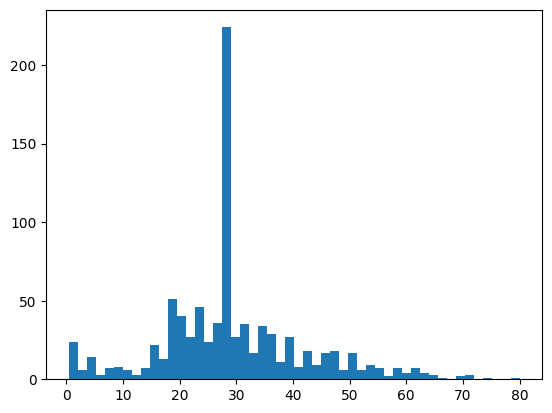

In [23]:
plt.hist(df['Age'], bins=50)
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


Checking the output column

In [25]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## Splitting of the train set and the test set

The best approach would be to use stratified shuffling so that the ratio of both the classes to the toal number of instance in both the training as well as testing set remains the same.

In [26]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Survived'])

In [27]:
train_set.shape

(712, 8)

In [28]:
test_set.shape

(179, 8)

In [29]:
train_set['Survived'].value_counts() / len(train_set)

Survived
0    0.616573
1    0.383427
Name: count, dtype: float64

In [30]:
test_set['Survived'].value_counts() / len(test_set)

Survived
0    0.614525
1    0.385475
Name: count, dtype: float64

## Visualizations and Outlier Detection

Univariate Analysis

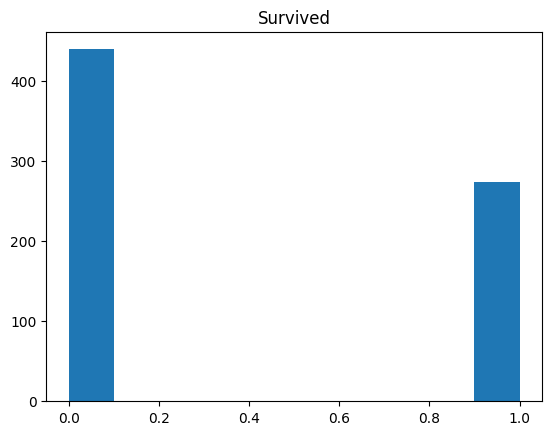

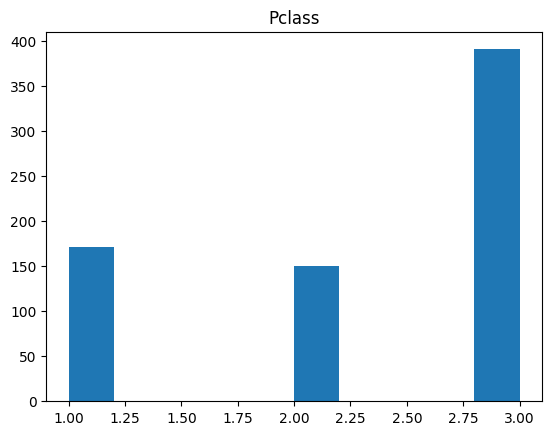

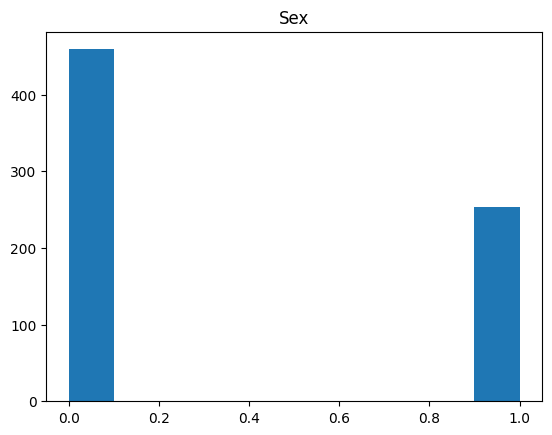

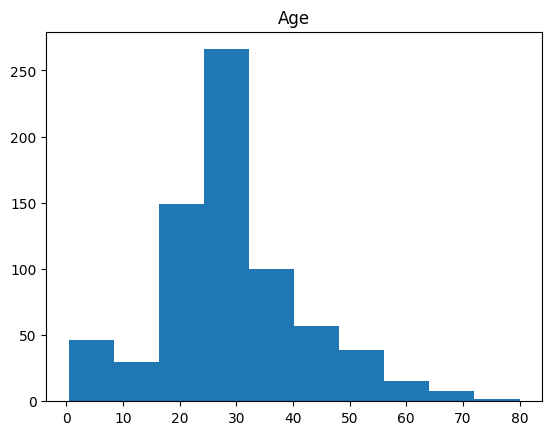

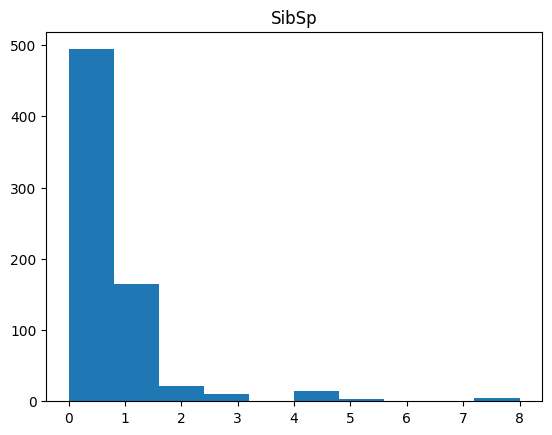

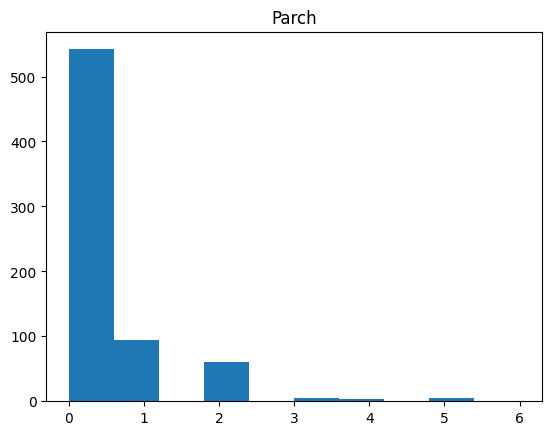

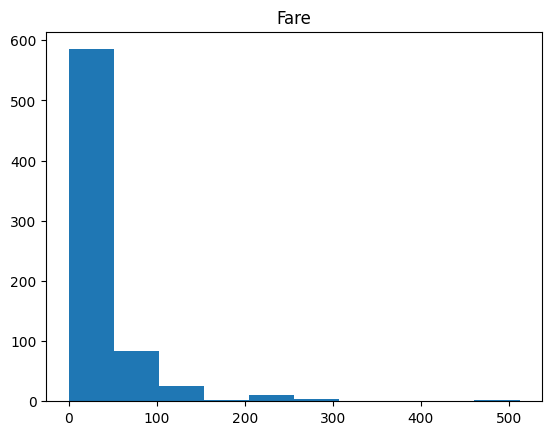

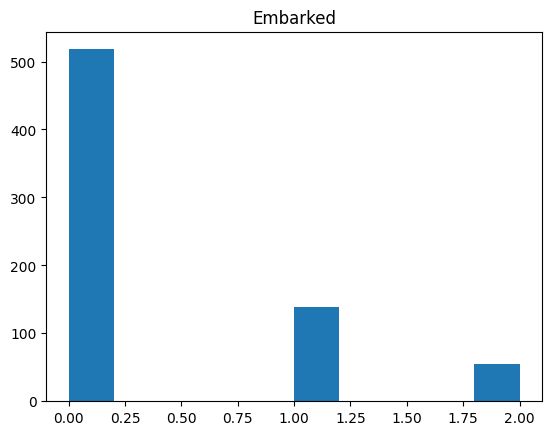

In [31]:
for i in train_set.columns:
  plt.hist(train_set[i])
  plt.title(i)
  plt.show()

Now lets plot boxplots to look for outliers.

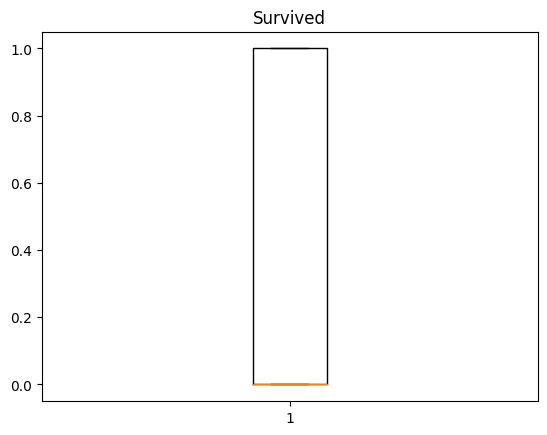

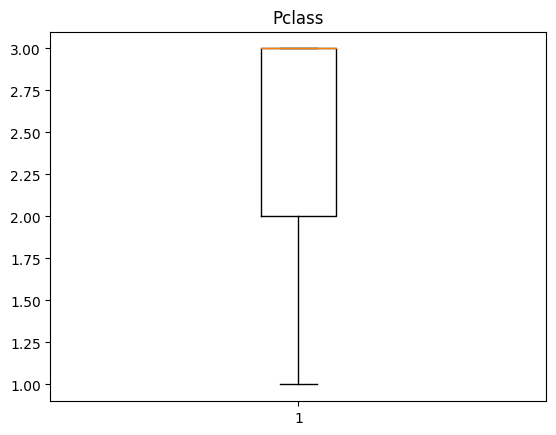

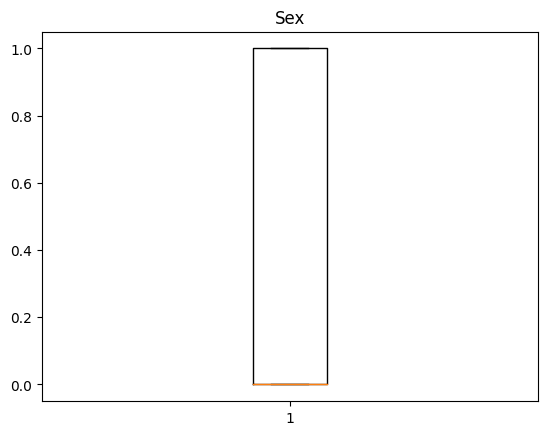

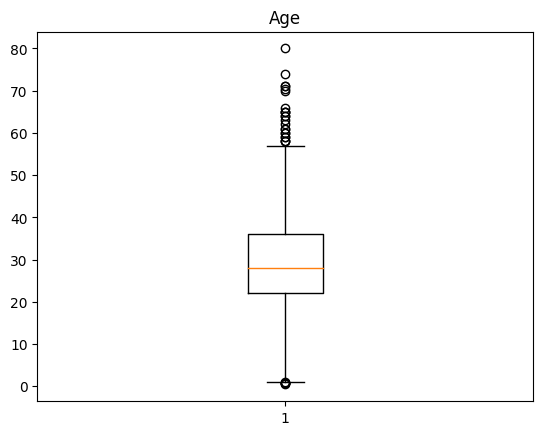

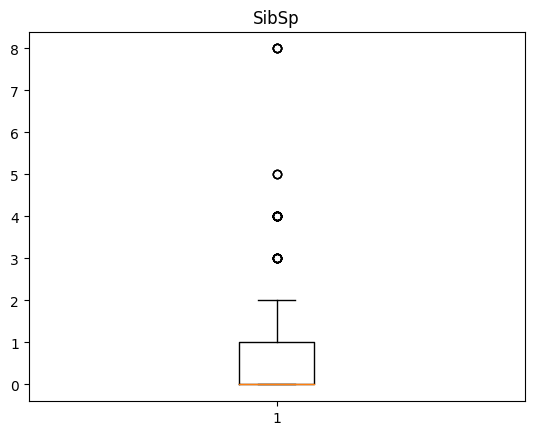

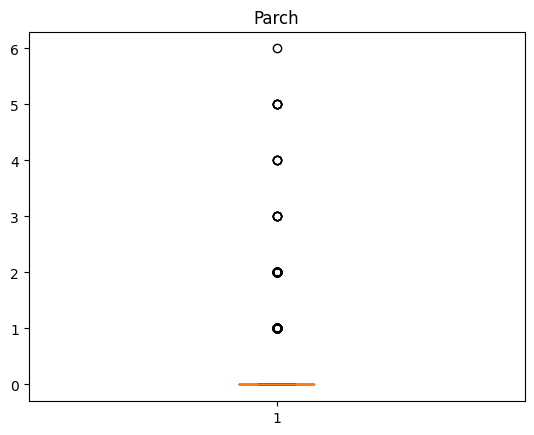

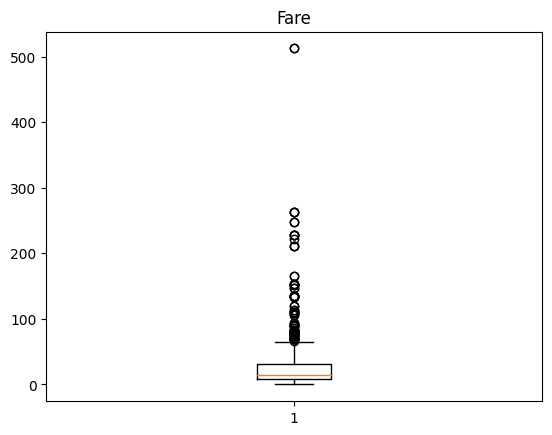

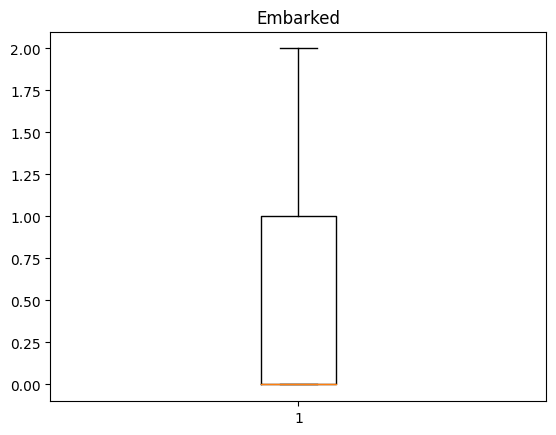

In [32]:
for i in train_set.columns:
  plt.boxplot(train_set[i])
  plt.title(i)
  plt.show()

There don't seem to be much outliers, let us keep them for now.

Multivariate Analysis

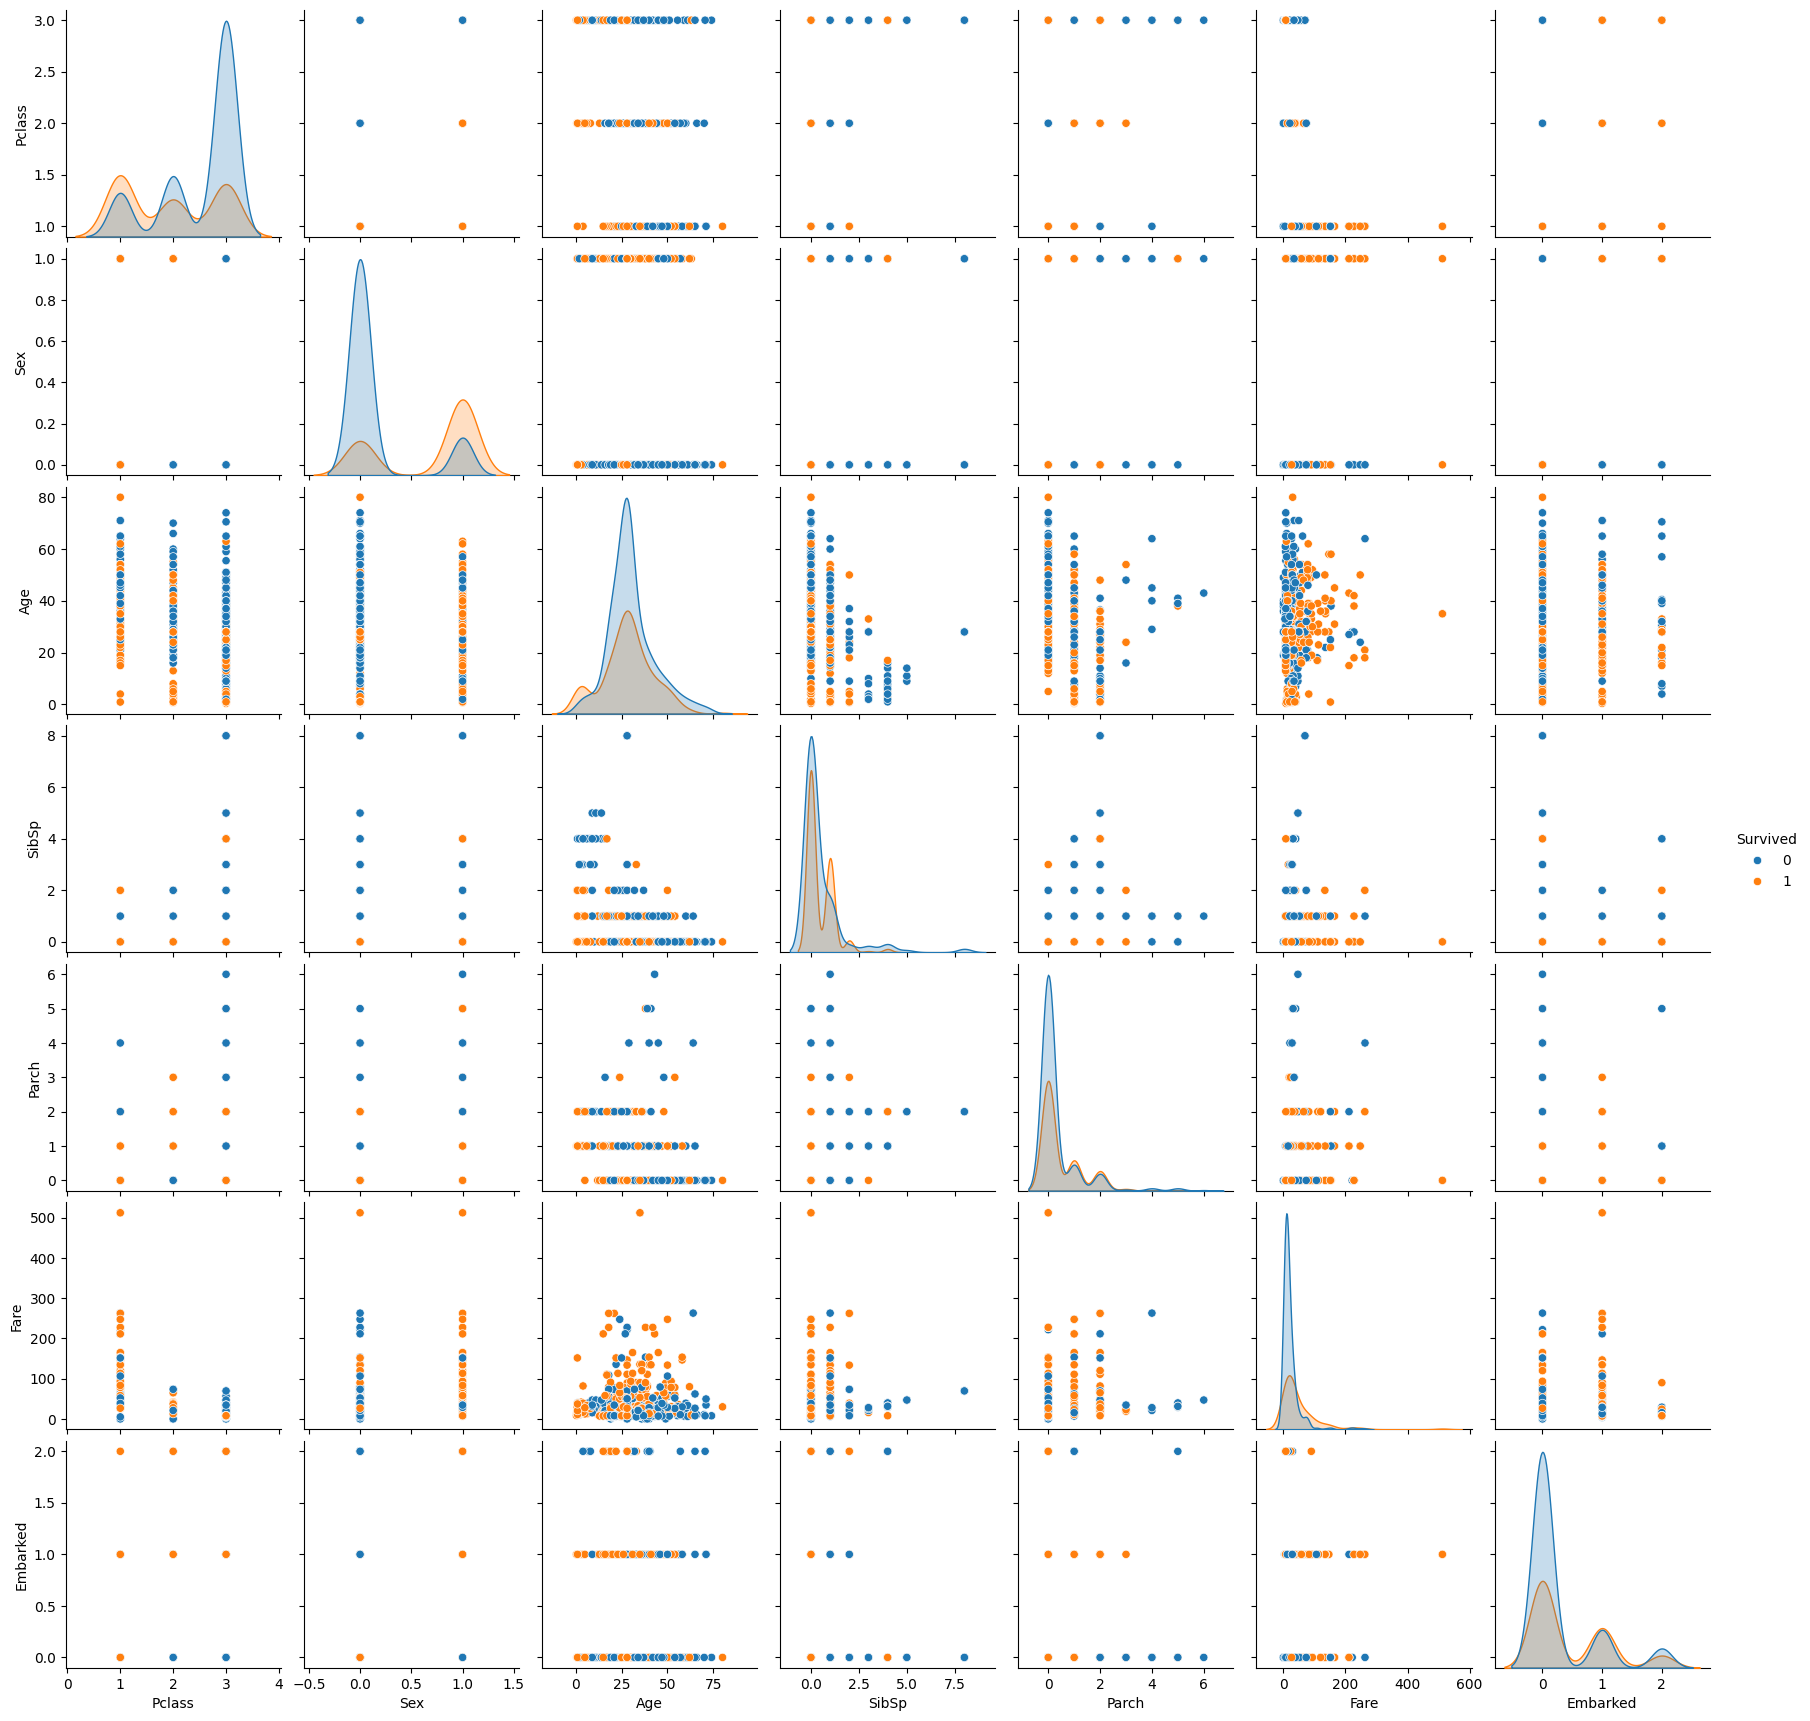

In [41]:
sns.pairplot(train_set, hue = 'Survived')
plt.show()

## Correlations

In [42]:
train_set.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.348007,0.549171,-0.071325,-0.026115,0.084178,0.275499,0.142687
Pclass,-0.348007,1.000000,-0.145052,-0.322509,0.097900,0.040467,-0.556540,0.011082
Sex,0.549171,-0.145052,1.000000,-0.074367,0.100430,0.256527,0.206986,0.135431
Age,-0.071325,-0.322509,-0.074367,1.000000,-0.238496,-0.160241,0.105623,0.002820
SibSp,-0.026115,0.097900,0.100430,-0.238496,1.000000,0.392269,0.127011,-0.046637
Parch,0.084178,0.040467,0.256527,-0.160241,0.392269,1.000000,0.177235,-0.076580
Fare,0.275499,-0.556540,0.206986,0.105623,0.127011,0.177235,1.000000,0.097386
Embarked,0.142687,0.011082,0.135431,0.002820,-0.046637,-0.076580,0.097386,1.000000


There seems to be a very high correlation between Sex and Survived, it is so because women were given more priority than men hence more women survived.

Pclass also has a negative correlation which suggest people with lower Pclass values survived meaning people with 1st > 2nd > 3rd class tickets.

Fare also plays the same role as Pclass, more money for a ticket the higher is chance of the person being VIP hence being saved.

Let us not exclude the other columns like Age as it might have a non-linear relationship, the population of the people in the middle age group is the highest as we have filled the Null values with the median age which was 28.

## Skewness

Acceptable skewness is near about 0.5, so let us try to bring some of the column values to that range.

In [46]:
train_set.skew()

Survived    0.480519
Pclass     -0.630589
Sex         0.605783
Age         0.470925
SibSp       3.815617
Parch       2.842562
Fare        4.646190
Embarked    1.569926
dtype: float64

In [47]:
train_set['Fare'] = np.power(train_set['Fare'], 1/4)

In [50]:
test_set['Fare'] = np.power(test_set['Fare'], 1/4)

We won't be touching other columns as they are categorical in nature.

In [48]:
train_set.skew()

Survived    0.480519
Pclass     -0.630589
Sex         0.605783
Age         0.470925
SibSp       3.815617
Parch       2.842562
Fare        0.379797
Embarked    1.569926
dtype: float64

## Variance Inflation Factor

There seems to be multicollinearity, but not an extreme value. Hence it is ok to keep the columns as it is for now. A value greater than 10 is considered usually extreme which eventually might cause problems during prediction.

Fare column seems to have a higher value nearing 10 but it is an important column hence we need to retain it.

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = train_set.columns
vif['VIF'] = [variance_inflation_factor(train_set.values, i) for i in range(train_set.shape[1])]
vif

,Features,VIF
0,Survived,2.665020
1,Pclass,3.990203
2,Sex,2.406498
3,Age,5.986026
4,SibSp,1.624241
5,Parch,1.607736
6,Fare,9.899271
7,Embarked,1.393347


If we drop the Fare column, apparently the accuracy drops by around 2%. As mentioned even though the VIF value of Fare is high, it is still a column that contributes to a significant amount of information for the model and hence dropping it won't be a good idea.

## Splitting the data into X and y

In [79]:
X_train = train_set.drop(['Survived'], axis = 1)
y_train = train_set['Survived']

In [80]:
  X_test = test_set.drop(['Survived'], axis = 1)
  y_test = test_set['Survived']

In [81]:
X_train.shape

(712, 7)

In [82]:
y_train.shape

(712,)

In [83]:
X_test.shape

(179, 7)

In [84]:
y_test.shape

(179,)

## Scaling the Data

Scaling the Data

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Models

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [87]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_scaled, y_train)
sgd_clf.score(X_test_scaled, y_test)

0.7653631284916201

In [88]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

0.7932960893854749

In [89]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt.score(X_test_scaled, y_test)


0.8212290502793296

In [90]:
rt = RandomForestClassifier(random_state=42)
rt.fit(X_train_scaled, y_train)
rt.score(X_test_scaled, y_test)

0.8156424581005587

In [91]:
svc_clf = SVC(random_state=42)
svc_clf.fit(X_train_scaled, y_train)
svc_clf.score(X_test_scaled, y_test)

0.8100558659217877

In [92]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, y_train)
knn_clf.score(X_test_scaled, y_test)

0.770949720670391

## Conclusion

The Descision Tree Classifier seems to have performed the best with an accuracy of 82.19% on the Test Set.